In [21]:
import pandas as pd

df = pd.read_csv('../../data/pre/2023-10-01_2024-10-04_HOUR_final.csv')
df

,tic,date,open,close,high,low,volume,lot,vix,macd,...,Долг/EBITDA,ROE,ROA,Return on Sales,ROIC,ROCE,Net Margin,Операционная маржа,EBITDA рентабельность,Тек. ливкидность
0,ABIO,2023-10-01 07:00:00,115.22,115.22,115.22,115.22,0.0,10.0,17.85,0.000000,...,0.00,0.0,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000
1,ABIO,2023-10-01 08:00:00,115.22,115.22,115.22,115.22,0.0,10.0,17.85,0.000000,...,0.00,0.0,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000
2,ABIO,2023-10-01 09:00:00,115.22,115.22,115.22,115.22,0.0,10.0,17.85,0.000000,...,0.00,0.0,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000
3,ABIO,2023-10-01 10:00:00,115.22,115.22,115.22,115.22,0.0,10.0,17.85,0.000000,...,0.00,0.0,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000
4,ABIO,2023-10-01 11:00:00,115.22,115.22,115.22,115.22,0.0,10.0,17.85,0.000000,...,0.00,0.0,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825658,YDEX,2024-10-03 16:00:00,3940.00,3941.00,3953.00,3937.00,21843.0,1.0,19.90,-8.129561,...,0.61,5.2,3.85,11.18,5.25,8.0193,6.3852,14.0828,29.0859,2.5845
825659,YDEX,2024-10-03 17:00:00,3941.00,3959.00,3959.00,3939.00,9880.0,1.0,19.90,-4.877204,...,0.61,5.2,3.85,11.18,5.25,8.0193,6.3852,14.0828,29.0859,2.5845
825660,YDEX,2024-10-03 18:00:00,3958.50,3968.50,3970.00,3955.00,25588.0,1.0,19.90,-1.515645,...,0.61,5.2,3.85,11.18,5.25,8.0193,6.3852,14.0828,29.0859,2.5845
825661,YDEX,2024-10-03 19:00:00,3969.00,3967.00,3974.00,3962.00,15508.0,1.0,19.90,1.015669,...,0.61,5.2,3.85,11.18,5.25,8.0193,6.3852,14.0828,29.0859,2.5845


In [38]:
corr_method = 'spearman'  # {'pearson', 'kendall', 'spearman'}
df_num = df.drop(columns=['tic', 'date'])
# Обязательные столбцы, которые нельзя удалять
essential_columns = ['open', 'close', 'high', 'low', 'volume', 'lot']

In [39]:
def max_corr_columns(corr_df, threshold=0.95):
    corr_matrix = corr_df.abs()
    corr_cols = set()

    # Цикл по столбцам для выявления групп коррелирующих столбцов
    for col in corr_matrix.columns:
        if col in corr_cols or col in essential_columns:
            continue

        # Находим столбцы, коррелирующие с текущим столбцом выше порога
        highly_correlated = corr_matrix[col][corr_matrix[col] > threshold].index.tolist()

        if len(highly_correlated) > 1:
            # Проверяем, есть ли в группе обязательные столбцы
            essential_in_group = [c for c in highly_correlated if c in essential_columns]

            # Если есть обязательные столбцы, удаляем все остальные
            if essential_in_group:
                to_remove = [c for c in highly_correlated if c not in essential_columns]
                corr_cols.update(to_remove)
            else:
                # Выбираем столбец с наибольшей корреляцией с остальными в группе
                correlation_sums = corr_matrix[highly_correlated].sum().sort_values(ascending=False)
                most_correlated_column = correlation_sums.idxmax()

                # Удаляем все остальные столбцы, кроме самого коррелирующего
                highly_correlated.remove(most_correlated_column)
                corr_cols.update(highly_correlated)

    return corr_cols

Столбцы с высокой корреляцией:
set()


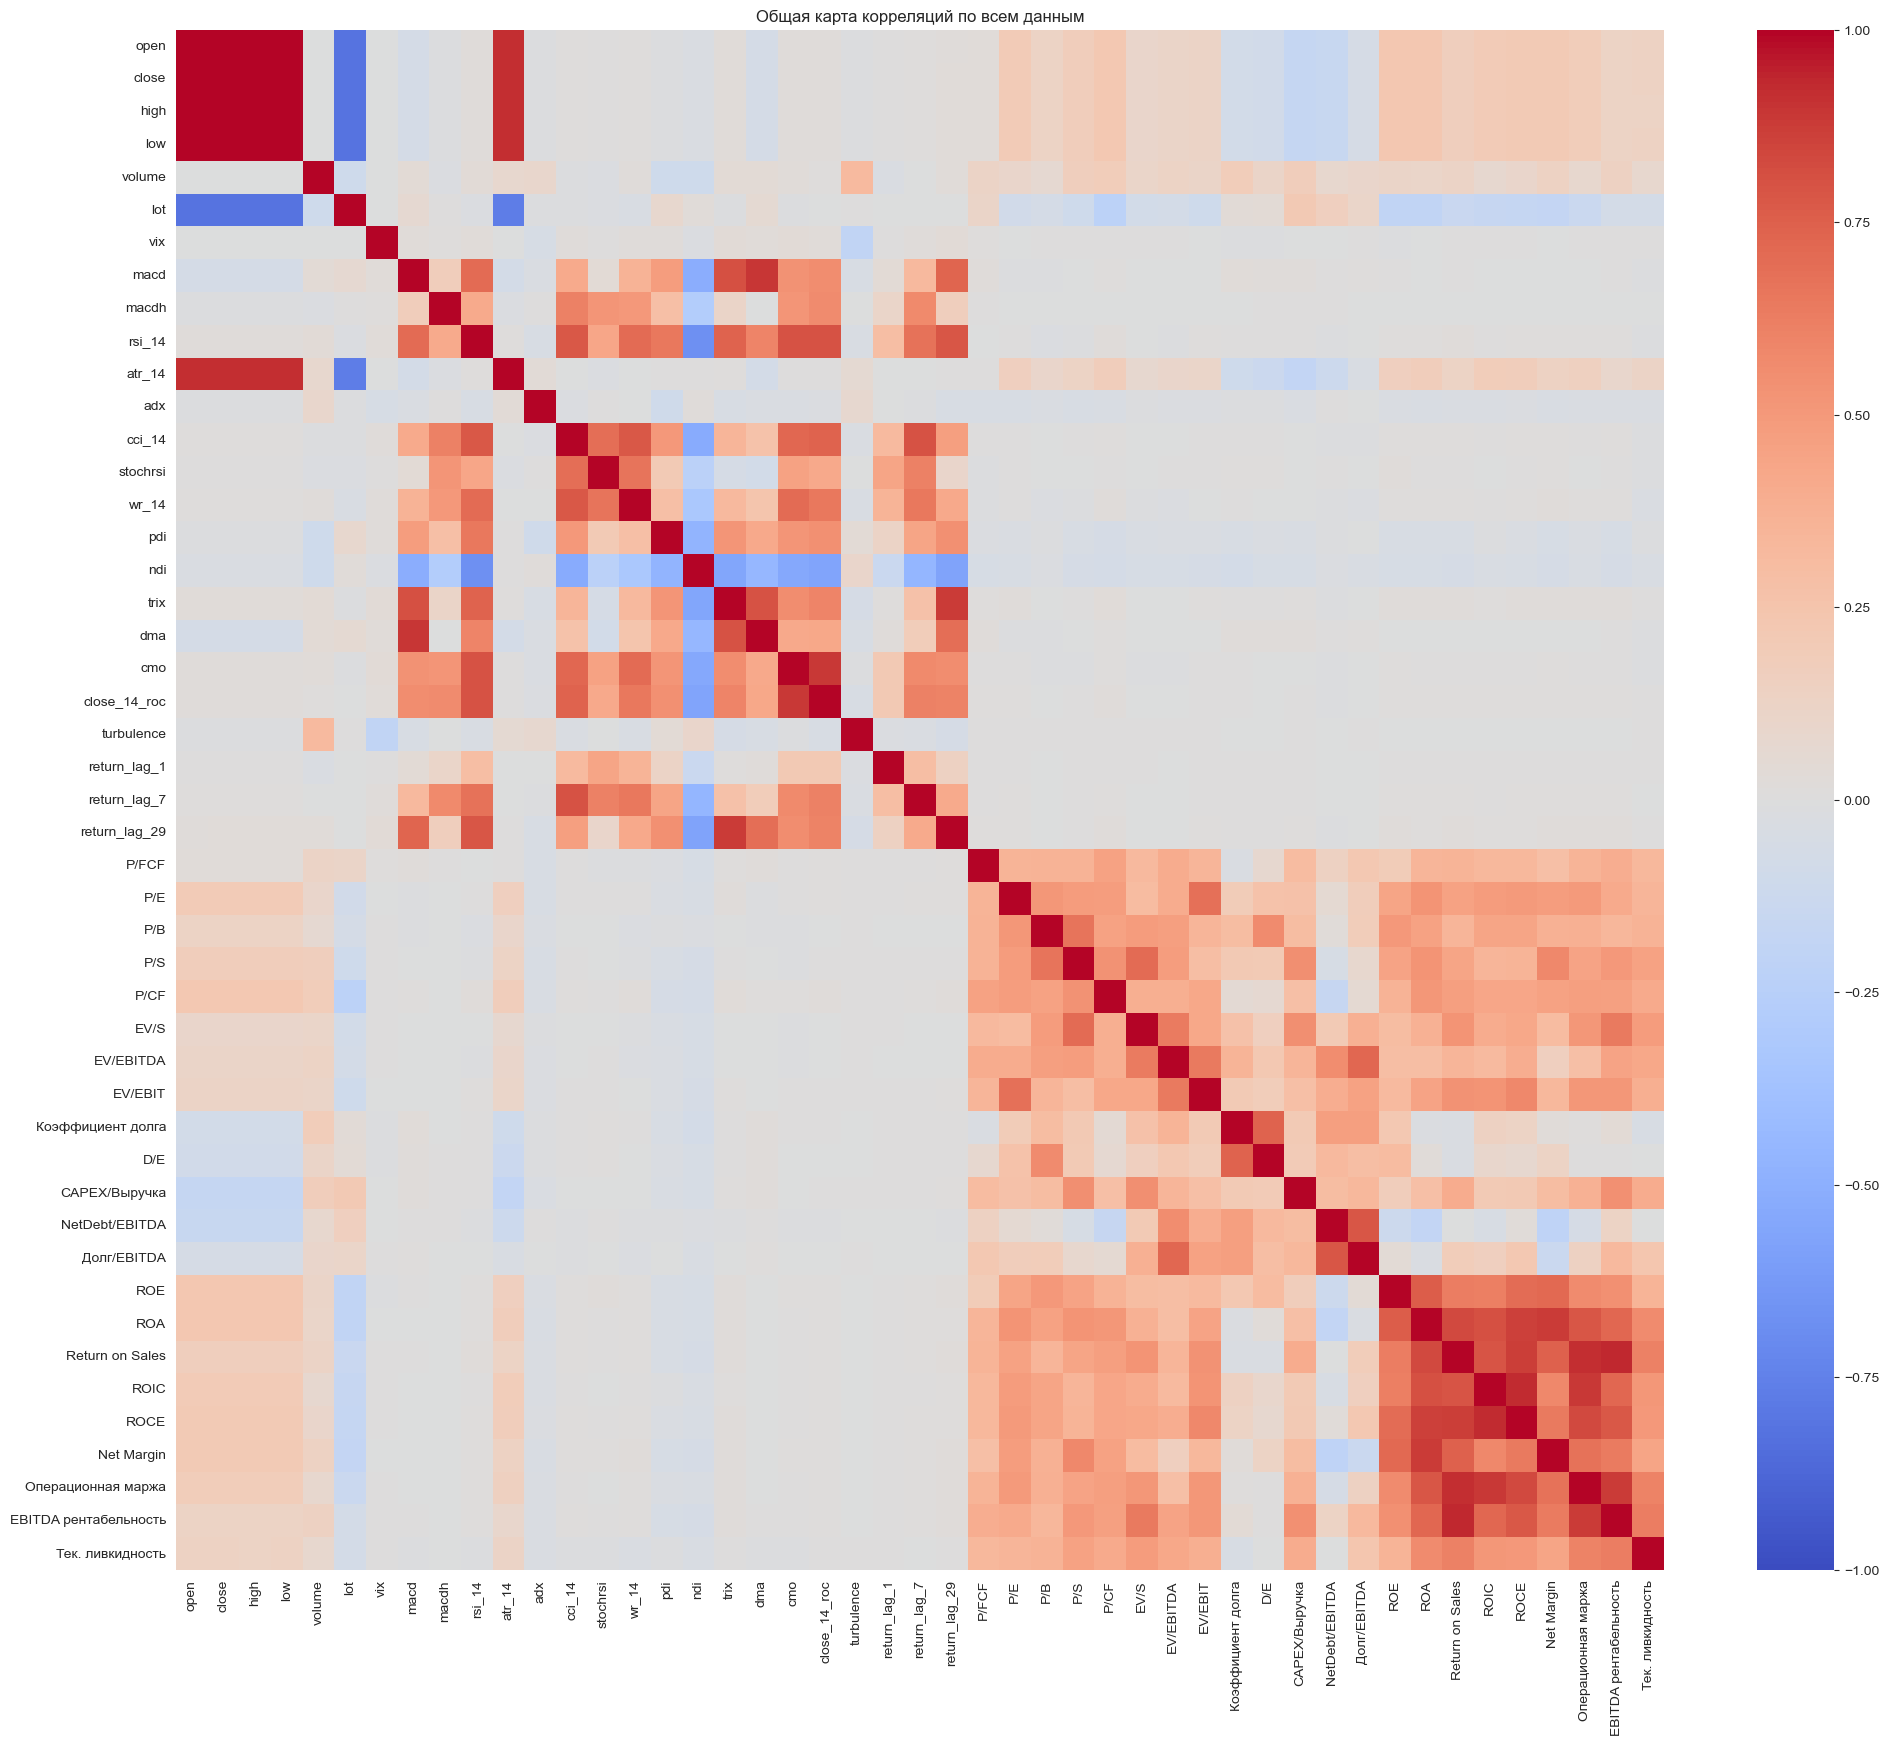

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисляем общую корреляцию
overall_corr = df_num.corr(method=corr_method)

columns_overall_corr = max_corr_columns(overall_corr)
print("Столбцы с высокой корреляцией:")
print(columns_overall_corr)

# Строим тепловую карту общей корреляции
plt.figure(figsize=(24, 20))
sns.heatmap(overall_corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Общая карта корреляций по всем данным')
plt.show()

C:\Users\oQaris\AppData\Local\Temp\ipykernel_19740\200913765.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = df.groupby('tic').apply(lambda x: x[df_num.columns].corr(method=corr_method))


Столбцы с высокой корреляцией:
{'ROCE', 'EBITDA рентабельность', 'Операционная маржа', 'ROIC', 'ROE', 'EV/S', 'ROA', 'Тек. ливкидность', 'NetDebt/EBITDA', 'EV/EBITDA', 'trix', 'dma', 'EV/EBIT', 'Net Margin', 'Return on Sales', 'Коэффициент долга', 'D/E'}


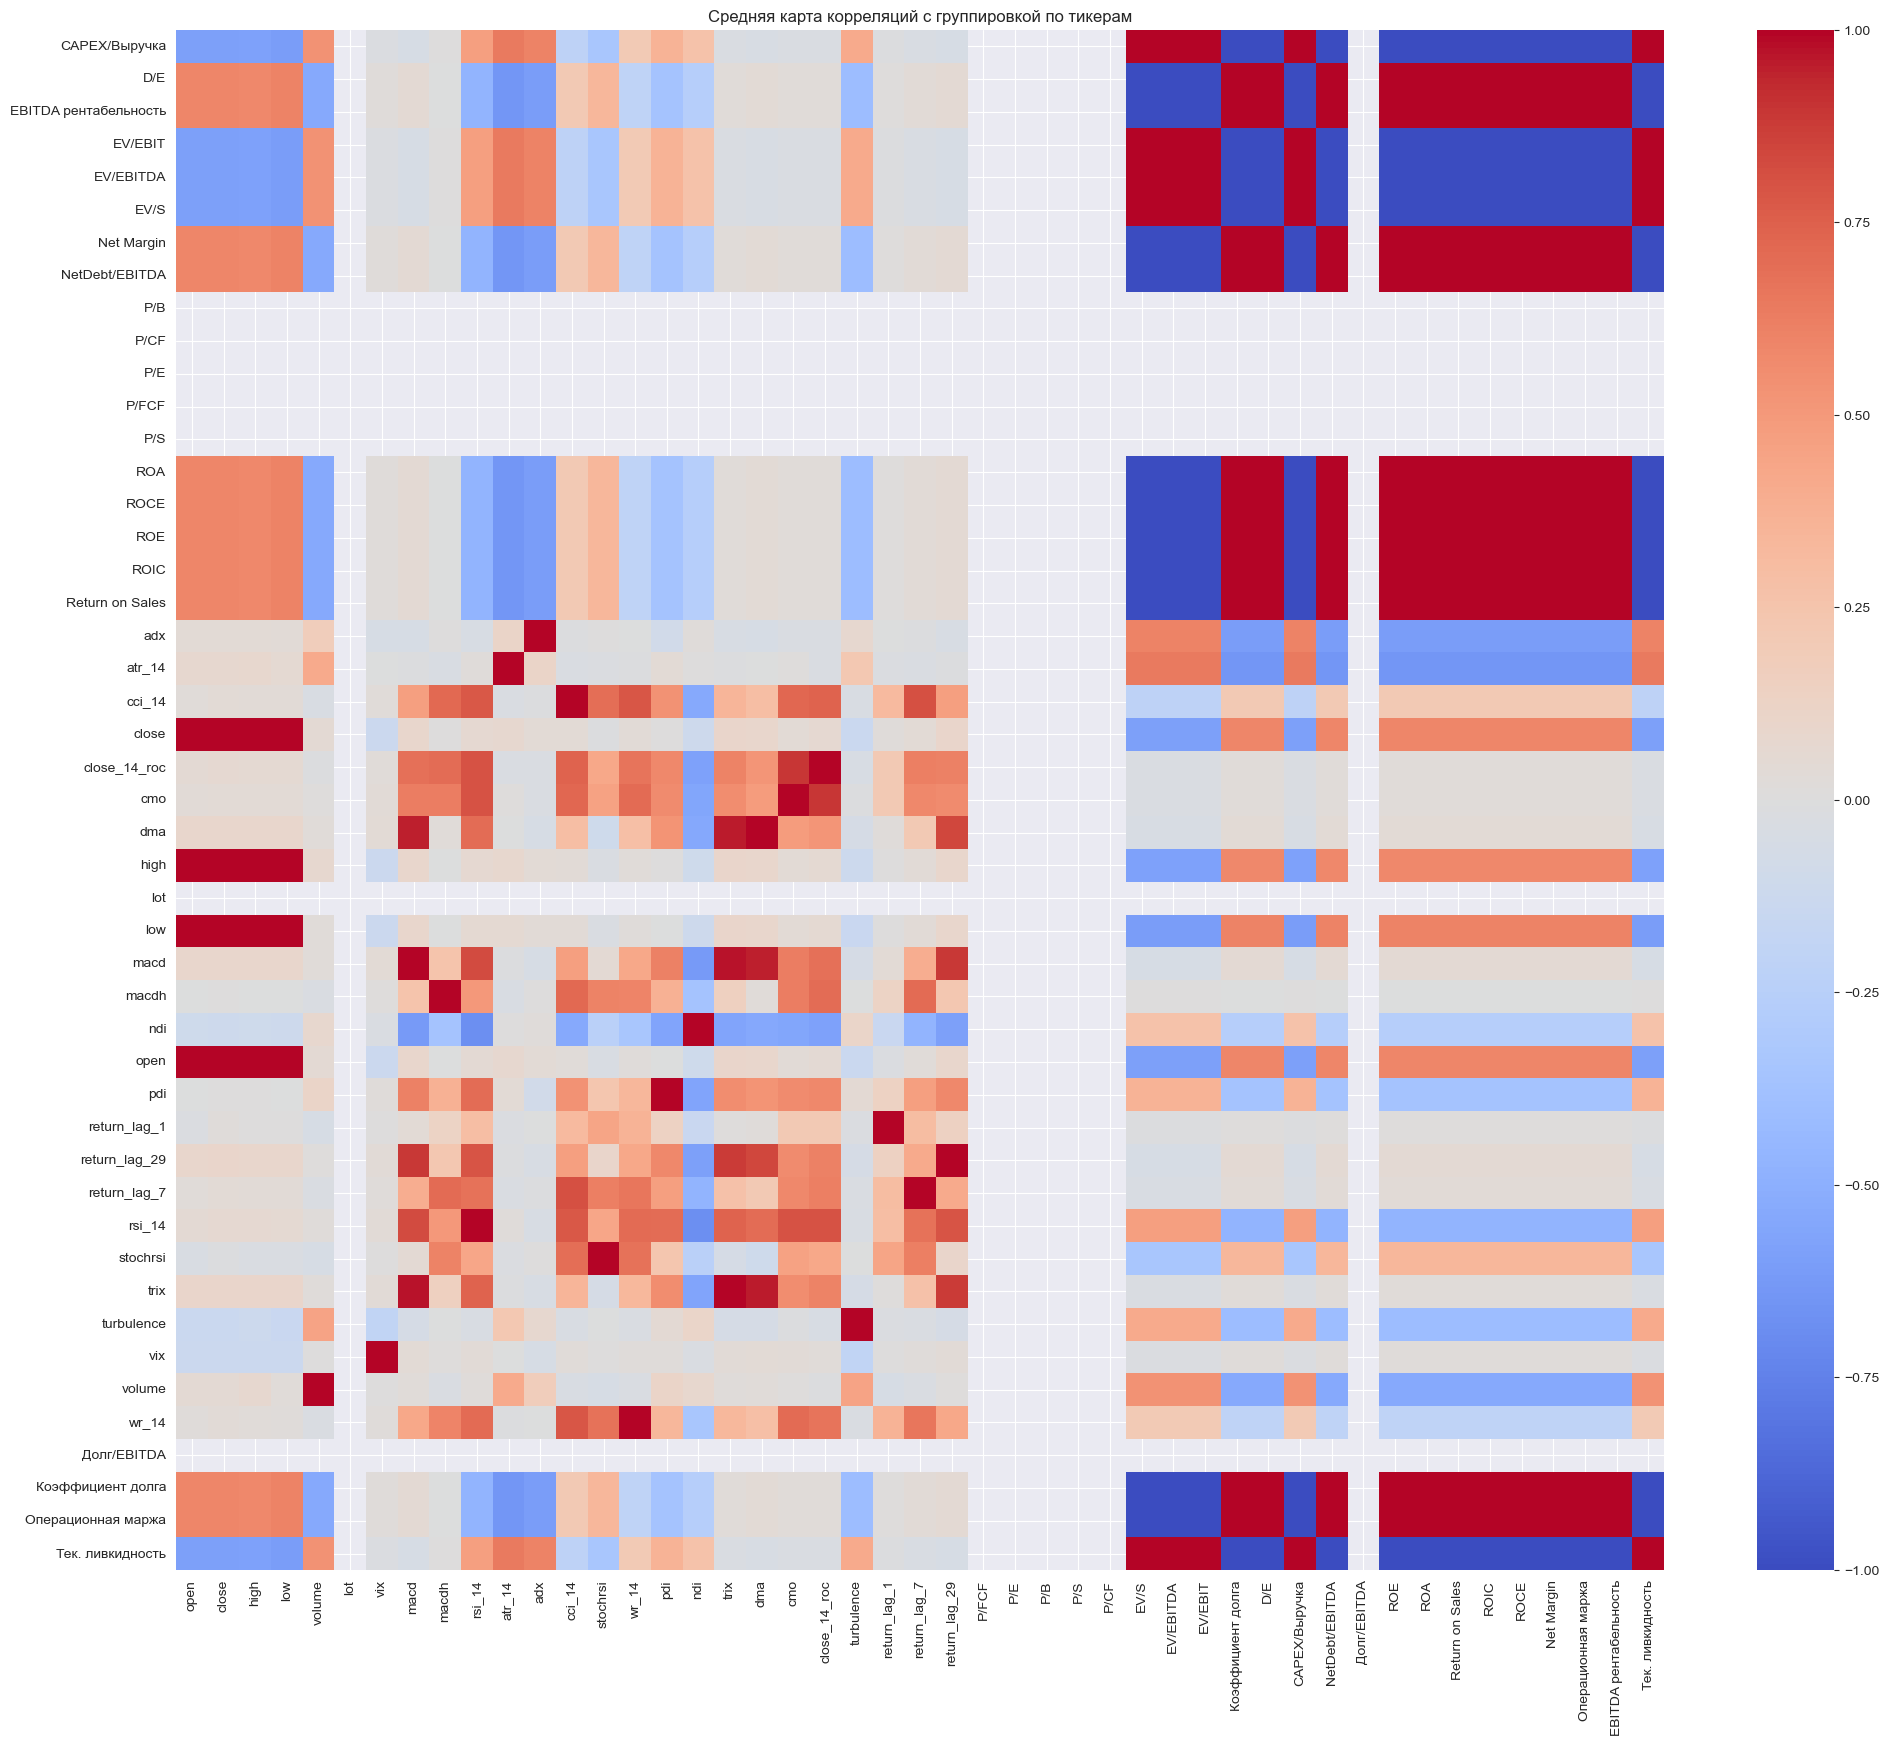

In [41]:
# Группируем по 'tic' и вычисляем корреляции для каждой группы
correlations = df.groupby('tic').apply(lambda x: x[df_num.columns].corr(method=corr_method))

# Усредняем корреляции по группам
mean_corr = correlations.groupby(level=1).mean()

columns_mean_corr = max_corr_columns(mean_corr)
print("Столбцы с высокой корреляцией:")
print(columns_mean_corr)

# Строим тепловую карту корреляций
plt.figure(figsize=(24, 20))
sns.heatmap(mean_corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Средняя карта корреляций с группировкой по тикерам')
plt.show()

In [36]:
columns_to_remove = columns_overall_corr.intersection(columns_mean_corr)
columns_to_remove

{'boll',
 'boll_lb',
 'boll_ub',
 'close_10_ema',
 'close_10_sma',
 'close_20_ema',
 'close_20_sma',
 'close_5_ema',
 'close_5_sma',
 'macds',
 'vwma'}

In [43]:
df = df.drop(columns=columns_to_remove)

KeyError: "['close_20_ema', 'close_10_sma', 'boll_lb', 'close_5_ema', 'macds', 'close_5_sma', 'close_20_sma', 'vwma', 'boll', 'close_10_ema', 'boll_ub'] not found in axis"

In [69]:
from src.data_engine.normalizer import normalize

normalize(df)

Логарифмизация:
open
close
high
low
volume
turbulence

Стандартизация:
vix
macd
macdh
rsi_14
atr_14
adx
cci_14
stochrsi
wr_14
pdi
ndi
trix
dma
cmo
close_14_roc
return_lag_1
return_lag_7
return_lag_29
P/FCF
P/E
P/B
P/S
P/CF
EV/S
EV/EBITDA
EV/EBIT
Коэффициент долга
D/E
CAPEX/Выручка
NetDebt/EBITDA
Долг/EBITDA
ROE
ROA
Return on Sales
ROIC
ROCE
Net Margin
Операционная маржа
EBITDA рентабельность
Тек. ливкидность


,tic,date,open,close,high,low,volume,lot,vix,macd,...,ROE,ROA,Return on Sales,ROIC,ROCE,Net Margin,Операционная маржа,EBITDA рентабельность,Тек. ливкидность,price
0,ABIO,2023-10-01 07:00:00,-0.032168,-0.032140,-0.033215,-0.031000,-1.480656,10.0,0.875274,0.020998,...,-0.126733,-0.583061,-0.457987,-0.619481,-0.600198,-0.407043,-0.496062,-0.659870,-0.860595,115.22
1,ABIO,2023-10-01 08:00:00,-0.032168,-0.032140,-0.033215,-0.031000,-1.480656,10.0,0.875274,0.020998,...,-0.126733,-0.583061,-0.457987,-0.619481,-0.600198,-0.407043,-0.496062,-0.659870,-0.860595,115.22
2,ABIO,2023-10-01 09:00:00,-0.032168,-0.032140,-0.033215,-0.031000,-1.480656,10.0,0.875274,0.020998,...,-0.126733,-0.583061,-0.457987,-0.619481,-0.600198,-0.407043,-0.496062,-0.659870,-0.860595,115.22
3,ABIO,2023-10-01 10:00:00,-0.032168,-0.032140,-0.033215,-0.031000,-1.480656,10.0,0.875274,0.020998,...,-0.126733,-0.583061,-0.457987,-0.619481,-0.600198,-0.407043,-0.496062,-0.659870,-0.860595,115.22
4,ABIO,2023-10-01 11:00:00,-0.032168,-0.032140,-0.033215,-0.031000,-1.480656,10.0,0.875274,0.020998,...,-0.126733,-0.583061,-0.457987,-0.619481,-0.600198,-0.407043,-0.496062,-0.659870,-0.860595,115.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825658,YDEX,2024-10-03 16:00:00,1.295747,1.295872,1.295722,1.296842,0.964878,1.0,1.540111,-0.279474,...,-0.106646,-0.257175,-0.044830,-0.326040,-0.221500,-0.217438,0.065185,0.334534,0.683292,3941.00
825659,YDEX,2024-10-03 17:00:00,1.295843,1.297589,1.296294,1.297034,0.770709,1.0,1.540111,-0.159266,...,-0.106646,-0.257175,-0.044830,-0.326040,-0.221500,-0.217438,0.065185,0.334534,0.683292,3959.00
825660,YDEX,2024-10-03 18:00:00,1.297512,1.298492,1.297339,1.298561,1.003608,1.0,1.540111,-0.035021,...,-0.106646,-0.257175,-0.044830,-0.326040,-0.221500,-0.217438,0.065185,0.334534,0.683292,3968.50
825661,YDEX,2024-10-03 19:00:00,1.298510,1.298350,1.297718,1.299227,0.881047,1.0,1.540111,0.058537,...,-0.106646,-0.257175,-0.044830,-0.326040,-0.221500,-0.217438,0.065185,0.334534,0.683292,3967.00


In [74]:
from src.data_engine.technical import add_time_features

add_time_features(df)

,tic,date,open,close,high,low,volume,lot,vix,macd,...,EBITDA рентабельность,Тек. ливкидность,month_sin,month_cos,day_sin,day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos
0,ABIO,2023-10-01 07:00:00,115.22,115.22,115.22,115.22,0.0,10.0,17.85,0.000000,...,0.0000,0.0000,-0.866025,0.5,0.201299,0.979530,-0.781831,0.623490,0.965926,-2.588190e-01
1,ABIO,2023-10-01 08:00:00,115.22,115.22,115.22,115.22,0.0,10.0,17.85,0.000000,...,0.0000,0.0000,-0.866025,0.5,0.201299,0.979530,-0.781831,0.623490,0.866025,-5.000000e-01
2,ABIO,2023-10-01 09:00:00,115.22,115.22,115.22,115.22,0.0,10.0,17.85,0.000000,...,0.0000,0.0000,-0.866025,0.5,0.201299,0.979530,-0.781831,0.623490,0.707107,-7.071068e-01
3,ABIO,2023-10-01 10:00:00,115.22,115.22,115.22,115.22,0.0,10.0,17.85,0.000000,...,0.0000,0.0000,-0.866025,0.5,0.201299,0.979530,-0.781831,0.623490,0.500000,-8.660254e-01
4,ABIO,2023-10-01 11:00:00,115.22,115.22,115.22,115.22,0.0,10.0,17.85,0.000000,...,0.0000,0.0000,-0.866025,0.5,0.201299,0.979530,-0.781831,0.623490,0.258819,-9.659258e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825658,YDEX,2024-10-03 16:00:00,3940.00,3941.00,3953.00,3937.00,21843.0,1.0,19.90,-8.129561,...,29.0859,2.5845,-0.866025,0.5,0.571268,0.820763,0.433884,-0.900969,-0.866025,-5.000000e-01
825659,YDEX,2024-10-03 17:00:00,3941.00,3959.00,3959.00,3939.00,9880.0,1.0,19.90,-4.877204,...,29.0859,2.5845,-0.866025,0.5,0.571268,0.820763,0.433884,-0.900969,-0.965926,-2.588190e-01
825660,YDEX,2024-10-03 18:00:00,3958.50,3968.50,3970.00,3955.00,25588.0,1.0,19.90,-1.515645,...,29.0859,2.5845,-0.866025,0.5,0.571268,0.820763,0.433884,-0.900969,-1.000000,-1.836970e-16
825661,YDEX,2024-10-03 19:00:00,3969.00,3967.00,3974.00,3962.00,15508.0,1.0,19.90,1.015669,...,29.0859,2.5845,-0.866025,0.5,0.571268,0.820763,0.433884,-0.900969,-0.965926,2.588190e-01
